In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numexpr as ne
import seaborn as sns
from time import time
from random import  random

sns.set()
%matplotlib inline


In [ ]:
#MELT

In [68]:
pivotedtips=tips.pivot_table(index='day', values='total_bill', columns='time')

tips.melt(id_vars='total_bill', value_vars='tip')

,total_bill,variable,value
0,16.99,tip,1.01
1,10.34,tip,1.66
2,21.01,tip,3.50
3,23.68,tip,3.31
4,24.59,tip,3.61
...,...,...,...
239,29.03,tip,5.92
240,27.18,tip,2.00
241,22.67,tip,2.00
242,17.82,tip,1.75


In [78]:
titanc.columns
titanc.melt(id_vars='age', value_vars='embark_town', value_name='town')

,age,variable,town
0,22.000000,embark_town,Southampton
1,38.000000,embark_town,Cherbourg
2,26.000000,embark_town,Southampton
3,35.000000,embark_town,Southampton
4,35.000000,embark_town,Southampton
...,...,...,...
886,27.000000,embark_town,Southampton
887,19.000000,embark_town,Southampton
888,26.555556,embark_town,Southampton
889,26.000000,embark_town,Cherbourg


In [3]:
#MERGING
#IN order to merge, both tables must have a column in common to join them on

In [82]:
df1= pd.DataFrame( [[1,2,3,4],
                    [5,6,7,8]], columns=['a','b','c','d'])
df2= pd.DataFrame([[9,10,11,5],
                   [13,14,15,9]], columns=['a','b','c','d'])
display(df1,df2)
pd.merge(df1,df2, how='outer')


,a,b,c,d
0,1,2,3,4
1,5,6,7,8


,a,b,c,d
0,9,10,11,5
1,13,14,15,9


,a,b,c,d
0,1,2,3,4
1,5,6,7,8
2,9,10,11,5
3,13,14,15,9


In [5]:
df3= pd.DataFrame({'Year':[ 2001,2002,2003,2004],
                   'Int rate':[2,3,2,2],
                   'GDP':[50,55,65,55]})
df4= pd.DataFrame({'Year': [2001,2003,2004,2005],
                   'Int rate': [7,8,9,6],
                   'Low': [50,52,50,53]})
display(df3,df4)
print('outer merge, everything')
display(pd.merge(df3,df4, on='Year', how='outer'))

print('inner merge, only same years')      
display(pd.merge(df3,df4, on='Year', how='inner')  )    
         
print('left merge, everything from left and matching years from right')      
display(pd.merge(df3,df4, on='Year', how='left'))

print('right merge, everything from right and matching years from left')     
pd.merge(df3,df4, on='Year', how='right')  

,Year,Int rate,GDP
0,2001,2,50
1,2002,3,55
2,2003,2,65
3,2004,2,55


,Year,Int rate,Low
0,2001,7,50
1,2003,8,52
2,2004,9,50
3,2005,6,53


outer merge, everything


,Year,Int rate_x,GDP,Int rate_y,Low
0,2001,2.0,50.0,7.0,50.0
1,2002,3.0,55.0,NaN,NaN
2,2003,2.0,65.0,8.0,52.0
3,2004,2.0,55.0,9.0,50.0
4,2005,NaN,NaN,6.0,53.0


inner merge, only same years


,Year,Int rate_x,GDP,Int rate_y,Low
0,2001,2,50,7,50
1,2003,2,65,8,52
2,2004,2,55,9,50


left merge, everything from left and matching years from right


,Year,Int rate_x,GDP,Int rate_y,Low
0,2001,2,50,7.0,50.0
1,2002,3,55,NaN,NaN
2,2003,2,65,8.0,52.0
3,2004,2,55,9.0,50.0


right merge, everything from right and matching years from left


,Year,Int rate_x,GDP,Int rate_y,Low
0,2001,2.0,50.0,7,50
1,2003,2.0,65.0,8,52
2,2004,2.0,55.0,9,50
3,2005,NaN,NaN,6,53


In [6]:
tips=sns.load_dataset('tips')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'tip amount')

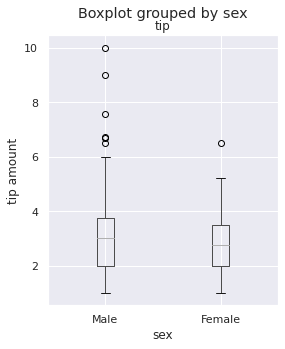

In [8]:
sns.set()
tips.boxplot(column='tip', by= 'sex', figsize=(4,5))
plt.ylabel('tip amount')



In [9]:
tips.groupby('sex')['tip'].median()

sex
Male      3.00
Female    2.75
Name: tip, dtype: float64

In [10]:
diamond=sns.load_dataset('diamonds')

In [11]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
mostpremium=diamond.pivot_table(values='price', index='clarity', columns='cut', aggfunc=np.mean)
mostpremium

cut,Ideal,Premium,Very Good,Good,Fair
clarity,,,,,
IF,2272.913366,3856.143478,4396.216418,4098.323944,1912.333333
VVS1,2468.129458,2831.206169,2459.441065,2254.774194,3871.352941
VVS2,3250.290100,3795.122989,3037.765182,3079.108392,3349.768116
VS1,3489.744497,4485.462041,3805.353239,3801.445988,4165.141176
VS2,3284.550385,4550.331248,4215.759552,4262.236196,4174.724138
SI1,3752.118169,4455.269371,3932.391049,3689.533333,4208.279412
SI2,4755.952656,5545.936928,4988.688095,4580.260870,5173.916309
I1,4335.726027,3947.331707,4078.226190,3596.635417,3703.533333


In [13]:
titanc=sns.load_dataset('titanic')

In [14]:
titanc

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
xx=titanc.loc[  ( titanc['alive']=='no') & (titanc['class']=='Third'), :]
filler= xx['age'].mean()



In [16]:
titanc['age'].isnull()
titanc['age'].fillna(filler, inplace=True)       #fill with value you want or use a method

In [17]:
titanc['age'].isnull().value_counts()  #shows no nan after we filled

False    891
Name: age, dtype: int64

Text(0.5, 0, 'class')

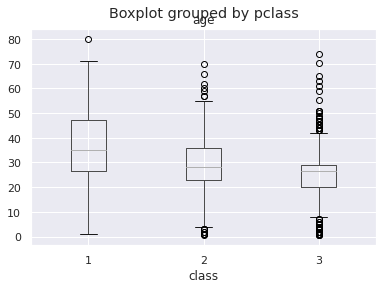

In [18]:
titanc.boxplot(column='age', by='pclass')
plt.xlabel('class')

In [19]:
titanc

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,26.555556,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [20]:
cutpoints=[0,25,50,100]
labels= ['young ', 'middle age', 'old']

titanc['age label']= pd.cut(titanc['age'], bins=cutpoints, labels=labels)
titanc

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age label
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,middle age
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle age
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,middle age
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,middle age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle age
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,young
888,0,3,female,26.555556,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,middle age
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle age


In [21]:
titanc.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [22]:
classgroup=titanc.groupby(by='pclass')
agebyclass=classgroup['age'].mean()

In [23]:
towngroup= titanc.groupby('embark_town')
agebytown= towngroup['age'].mean()

Text(0, 0.5, 'mean age')

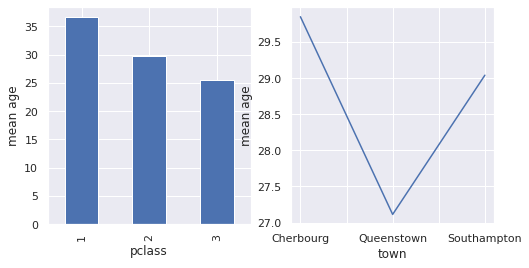

In [24]:
fig= plt.figure(figsize=(8,4))
ax1=  fig.add_subplot(121)
plt.xlabel('class')
plt.ylabel('mean age')
agebyclass.plot(kind='bar')


ax2= fig.add_subplot(122)
agebytown.plot()
plt.xlabel('town')
plt.ylabel('mean age')


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

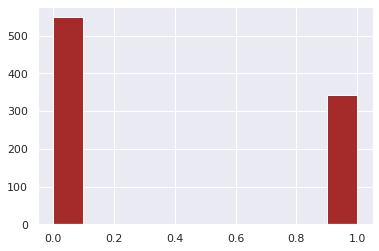

In [25]:
plt.hist(titanc['survived'], color='brown')

In [26]:
titanc['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [27]:
wholived=titanc.groupby('who')['alive'].value_counts()
wholived

who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: alive, dtype: int64

In [28]:
childrendead=titanc.loc[  (titanc['who']=='child') & (titanc['alive']=='no'), :]
len(childrendead.index)

34

In [29]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

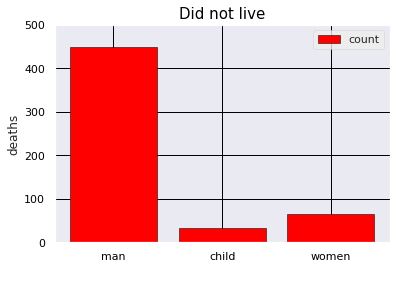

In [30]:
sns.set()

ax= plt.axes()
plt.style.use('bmh')


plt.bar(['man','child','women'], (449,34,66),label='count', color='red', edgecolor='black' )
plt.title('Did not live', color='black', fontsize=15)
plt.xlabel('Person', color='white')
plt.ylabel('deaths')
plt.yticks(color='black')
plt.xticks(color='black')
plt.ylim(0,500)

plt.grid(color='black', linestyle='solid')  #put a grid
plt.legend(loc='best')

#ax.yaxis.set_major_locator(plt.NullLocator())   #remove ticks on y axes


**THREE DIMENSIONAL: plt.axes(projection='3d')**

In [31]:
from mpl_toolkits import mplot3d

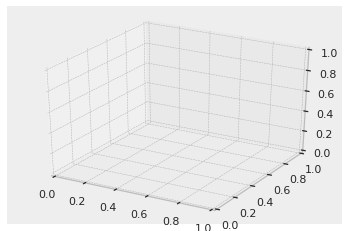

In [32]:
fig=plt.figure()
ax= plt.axes(projection='3d')

In [33]:
zline= np.linspace(0,15,1000)
xline= np.sin(zline)
yline= np.cos(zline)
ax.plot3D(xline, yline, zline,'gray')

zdata= 15 * np.random.random(100)
xdata= np.sin(zdata)+ 0.1* np.random.randn(100)
ydata= np.cos(zdata) + 0.1*np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata,c=zdata, cmap='Greens')
plt.show()

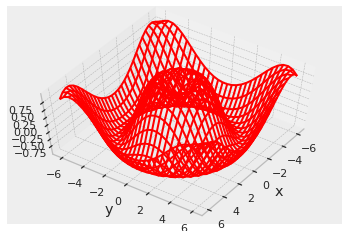

In [34]:
def f(x,y):
  return np.sin(np.sqrt( x**2 + y**2))

x= np.linspace(-6,6,30)
y= np.linspace(-6,6,30)

X,Y= np.meshgrid(x,y)
Z= f(X,Y)


fig=plt.figure()
ax= plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z, color='red')#,50, cmap='binary', color='black')
plt.xlabel('x')
plt.ylabel('y')

ax.view_init(elev=60, azim=35)

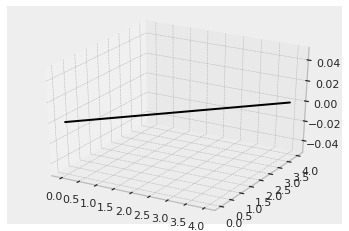

In [35]:
ax=plt.axes(projection='3d')
ax.plot(range(5),range(5), color='black')

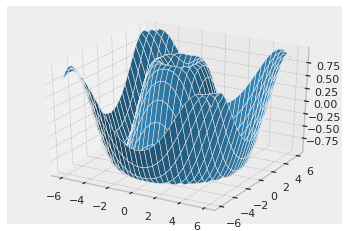

In [36]:
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1, cstride=1) #, cmap='viridis')

**Faceted histograms, other**

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


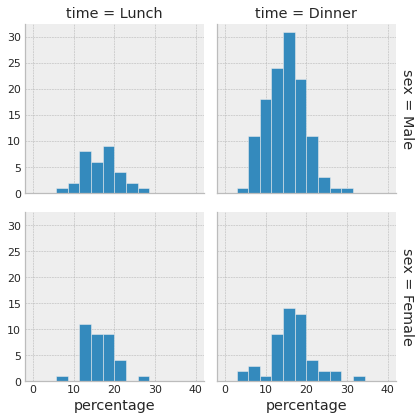

In [37]:
#if you want to plot a numeric value based on two paramaters, in this case, sex and time

display(tips.head())
tips['percentage']= 100* tips['tip']/ tips['total_bill']  #make the numeric column

grid=sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)

grid.map(plt.hist, 'percentage', bins=np.linspace(0,40,15))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


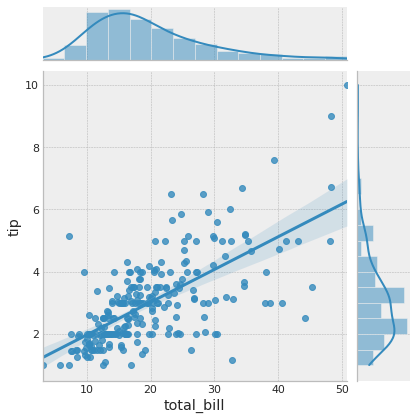

In [38]:
sns.jointplot('total_bill','tip', data=tips, kind='reg')

# we see there is upward trend but poor fit overall

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 8.960000000000004, 'By year')

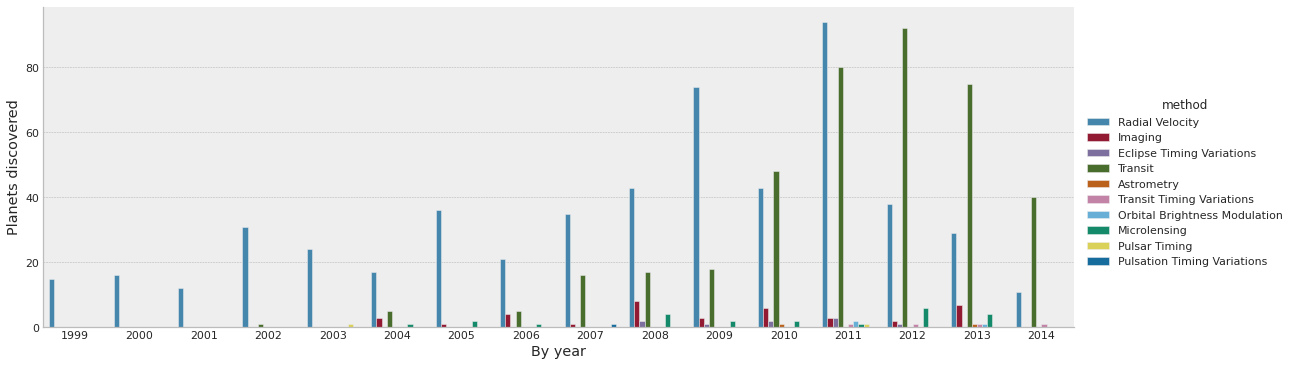

In [40]:
sns.factorplot('year', data=planets, kind='count', order=range(1999,2015), hue='method', aspect=3)
plt.ylabel('Planets discovered')
plt.xlabel('By year')

In [41]:
marathon= pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')
marathon.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


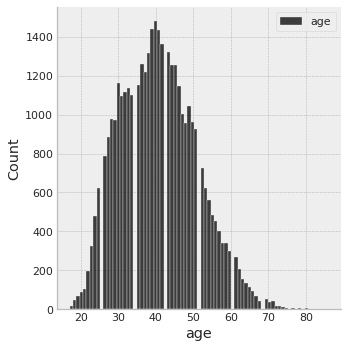

In [42]:
#distplot by age for all

sns.displot(data=marathon, x='age', label='age',color='black')
plt.legend()

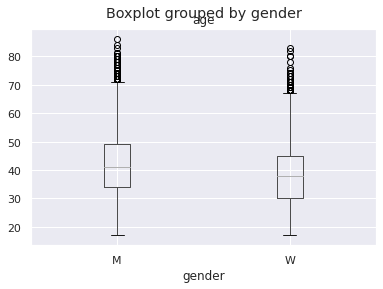

In [43]:
#boxplot  of age by gender

sns.set()

marathon.boxplot(column='age', by='gender')

(0.0, 2000.0)

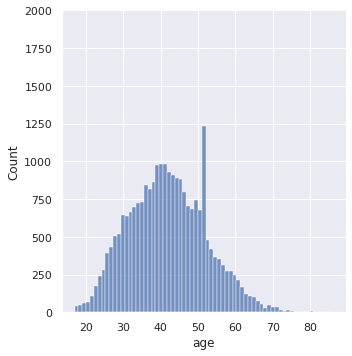

In [85]:
#distplot by male age
maleage=marathon.loc[marathon['gender']=='M','age']

sns.displot(data=marathon, x=maleage )
plt.ylim(0,2000)

In [92]:
display(
    marathon.loc[( marathon['age']>=51) & (marathon['age']<=52) &( marathon['gender']=='M'),['age']], 
 
  'mean= ',
     marathon.loc[marathon['gender']=='M','age'].mean()
)

#validate that there are that many men around 50 and the mean is around 40

,age
252,52
259,52
426,52
430,51
443,51
...,...
37142,51
37185,51
37206,51
37220,52


'mean= '

41.908696533549566